In [33]:
# Carga y exploración inicial del dataset
import pandas as pd

# Cargar datos desde un CSV
url = "https://raw.githubusercontent.com/geoluna/boston-housing-data/main/housing.csv"
df = pd.read_csv(url)

In [34]:
# Mostrar primeras filas y estadísticas resumidas
display(df.head())
display(df.describe().T)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [35]:
# Renombrado de columnas a español
# Renombrar columnas si quieres
df.columns = [
 'tasa_crimen', 'zona_residencial', 'proporcion_industrial',
 'rio_charles', 'ox_nitrogeno', 'habitaciones_prom',
 'porcentaje_antiguas', 'distancia_centros',
 'acceso_autopistas', 'impuesto_propiedad',
 'relacion_alumnos_profesor', 'poblacion_negra',
 'porcentaje_bajo_ingreso', 'valor_mediana_vivienda'
]
X_simple = df[['habitaciones_prom']]
y = df['valor_mediana_vivienda']

In [36]:
# Verificar cambio
display(df.head())

,tasa_crimen,zona_residencial,proporcion_industrial,rio_charles,ox_nitrogeno,habitaciones_prom,porcentaje_antiguas,distancia_centros,acceso_autopistas,impuesto_propiedad,relacion_alumnos_profesor,poblacion_negra,porcentaje_bajo_ingreso,valor_mediana_vivienda
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


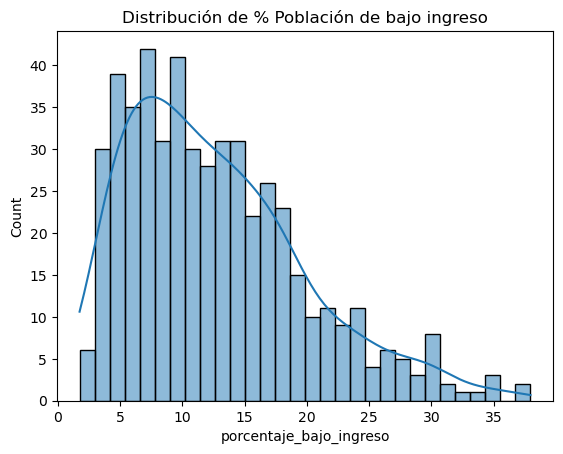

In [37]:
# Visualización exploratoria de las variables

import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de una variable relevante
sns.histplot(df['porcentaje_bajo_ingreso'], bins=30, kde=True)
plt.title("Distribución de % Población de bajo ingreso")
plt.show()


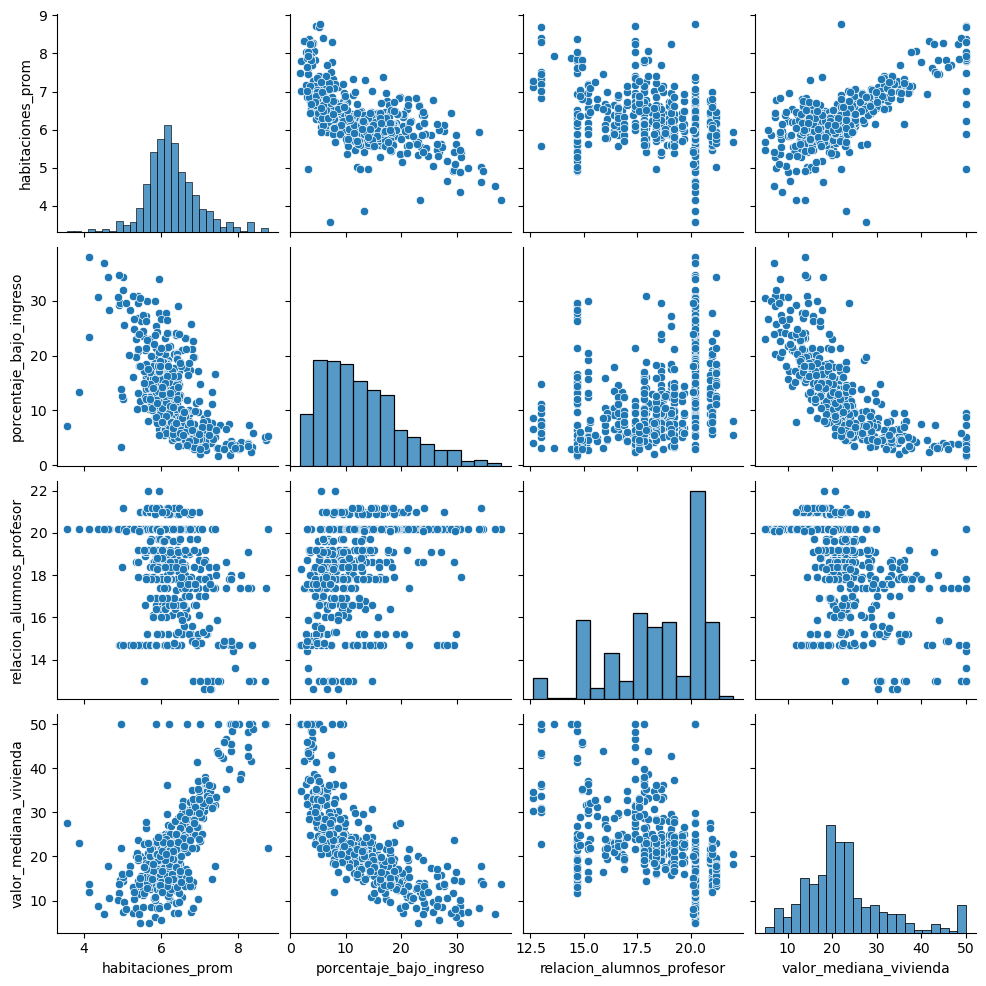

In [38]:
# Relación entre variables predictoras y variable objetivo
sns.pairplot(df[['habitaciones_prom','porcentaje_bajo_ingreso','relacion_alumnos_profesor','valor_mediana_vivienda']])
plt.show()

In [39]:
# Preprocesamiento y normalización de variables

from sklearn.preprocessing import StandardScaler

X = df[['habitaciones_prom','porcentaje_bajo_ingreso','relacion_alumnos_profesor']]
y = df['valor_mediana_vivienda']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [40]:
# Regresión lineal simple
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Variables
X_simple = df[['habitaciones_prom']]  # predictor
y = df['valor_mediana_vivienda']      # respuesta

In [41]:
# Ajustar modelo
modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y)

LinearRegression()

In [42]:
# Predicciones
y_pred = modelo_simple.predict(X_simple)

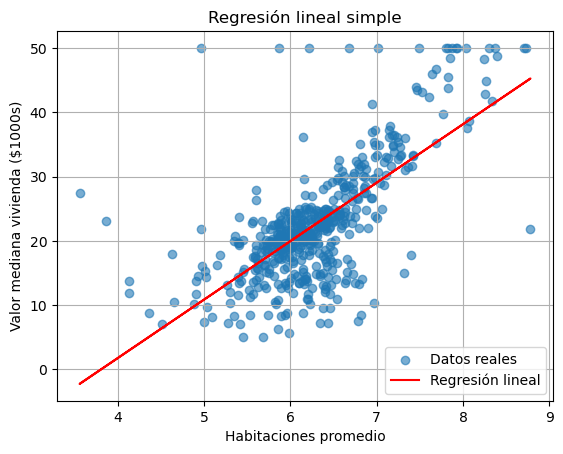

In [43]:
# Visualizar
plt.scatter(X_simple, y, alpha=0.6, label="Datos reales")
plt.plot(X_simple, y_pred, color='red', label="Regresión lineal")
plt.xlabel("Habitaciones promedio")
plt.ylabel("Valor mediana vivienda ($1000s)")
plt.title("Regresión lineal simple")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Coeficientes
print("Intercepto:", modelo_simple.intercept_)
print("Coeficiente (habitaciones):", modelo_simple.coef_[0])

Intercepto: -34.670620776438554
Coeficiente (habitaciones): 9.102108981180308


In [45]:
# FINAL DE REGRESION LINEAL SIMPLE

In [46]:
#  Implementación manual de regresión lineal multivariable
# Aquí se implementa desde cero un modelo de regresión lineal multivariable usando descenso por gradiente.

import numpy as np

# Agregar columna de unos (intercepto)
m = len(y)
X_b = np.c_[np.ones((m,1)), X_norm]
y_b = y.values.reshape(-1,1)

# Inicializar coeficientes (theta) y parámetros
theta = np.zeros((X_b.shape[1],1))
alpha, iterations = 0.1, 1000

# Funciones de costo y entrenamiento
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    return float((1/(2*m)) * np.sum((h - y)**2))

def gradient_descent(X, y, theta, alpha, iters):
    J_hist = []
    for _ in range(iters):
        theta -= (alpha/m) * X.T.dot(X.dot(theta)-y)
        J_hist.append(compute_cost(X, y, theta))
    return theta, J_hist

theta_final, J_hist = gradient_descent(X_b, y_b, theta, alpha, iterations)

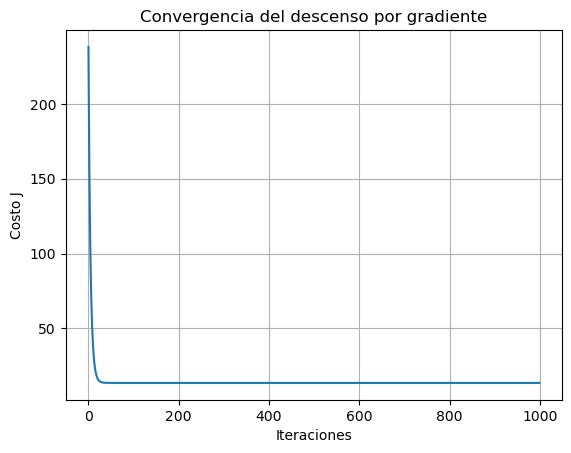

In [47]:
# Visualización del costo durante el entrenamiento

plt.plot(J_hist)
plt.xlabel('Iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del descenso por gradiente')
plt.grid(True)
plt.show()

In [48]:
# Comparación con modelos predefinidos
# Modelo sklearn

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_norm, y)

print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 22.532806324110677
Coeficientes: [ 3.16947562 -4.07926271 -2.01297157]


In [49]:
# Modelo statsmodels

import statsmodels.api as sm

X_sm = sm.add_constant(X_norm)
res = sm.OLS(y, X_sm).fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     valor_mediana_vivienda   R-squared:                       0.679
Model:                                OLS   Adj. R-squared:                  0.677
Method:                     Least Squares   F-statistic:                     353.3
Date:                    Sun, 22 Jun 2025   Prob (F-statistic):          2.69e-123
Time:                            18:13:21   Log-Likelihood:                -1553.0
No. Observations:                     506   AIC:                             3114.
Df Residuals:                         502   BIC:                             3131.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [50]:
# Evaluación de supuestos del modelo
# Verifica que se cumplan los supuestos de la regresión lineal: normalidad de residuos y homocedasticidad (igual varianza).

from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

residuos = res.resid


In [51]:
# Normalidad
stat, p_shapiro = shapiro(residuos)
print("Shapiro-Wilk p-valor:", p_shapiro)

Shapiro-Wilk p-valor: 1.0361929930374565e-18


In [52]:
# Homocedasticidad
bp_pvalue = het_breuschpagan(residuos, X_sm)[1]
print("Breusch-Pagan p-valor:", bp_pvalue)

Breusch-Pagan p-valor: 0.6543470467758215


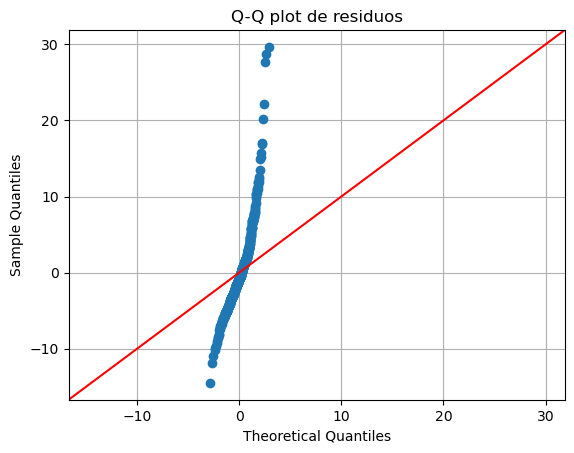

In [53]:
# Q-Q plot para residuos
sm.qqplot(residuos, line='45')
plt.title("Q-Q plot de residuos")
plt.grid(True)
plt.show()

In [54]:
df.to_excel('resultados_boston_housing.xlsx', index=False)


In [55]:
import IPython
IPython.display.FileLink('Resultados_boston_housing.xlsx')

C:\Users\Adrian\Resultados_boston_housing.xlsx